<h1>Neural Network Rectified Linear Unit (ReLU) vs Sigmoid</h1>

1. Define Several Neural Network, Criterion function, Optimizer.
2. Test Sigmoid and Relu.
3. Analyze Results.

In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
!conda install -y torchvision

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
#Setting the seed will allow us to control randomness and give us reproducibility
torch.manual_seed(2)


Defining neural network modele/class with 2 hidden layer. Using Sigmoid as the activation function.

In [4]:
class NN(nn.Module):
    #Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NN, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    #prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

Using ReLU as the activation function:


In [5]:
class NetRelu(nn.Module):
    #Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    #prediction
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

Defining a function to train the model, in this case, the function returns a Python dictionary to store the training loss and accuracy on the validation data

In [6]:
#Model training function

def train(model, criterion, train_loader, validation_loader, validation_dataset, optimizer, epochs=120):
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}
    for epoch in range(epochs):
        #For each batch in the training loader
        for i,  (x,y) in enumerate(train_loader):
            optimizer.zero_grad()
            #Makes a prediction on the image tensor by flattening it to a 1 by 28*28 tensor
            yhat = model(x.view(-1, 28*28))
            loss = criterion(yhat, y)
            #calculate the gradient value w.r.t. each weight and bias
            loss.backward()
            optimizer.step()
            #Saving the loss
            useful_stuff['training_loss'].append(loss.data.item())
            
          #Keeping track of correct predictions
        correct = 0
        #For each batch in the validation dataset
        for x, y in validation_loader:
            yhat = model(x.view(-1,28*28))
            #Get the class that have maximum value
            _, label = torch.max(yhat, 1)
            #Check
            correct += (label == y).sum().item()
            
        #Saving the accuracy in percentage
        accuracy = 100*(correct/len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
        
    return useful_stuff
            

**Making Some Data**

Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [7]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the testing dataset by setting the parameters <code>train</code> to <code>False</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [8]:
# Create the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function  


In [9]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()  #Moste important concept of the code!

Create the training-data loader and the validation-data loader object 


In [10]:
# Create the training data loader and validation data loader object

# Batch size is 2000 and shuffle=True means the data will be shuffled at every epoch
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
# Batch size is 5000 and the data will not be shuffled at every epoch
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

**Define Neural Network, Criterion Function, Optimizer and Train the Model**

In [11]:
#Setting the parameters to create the model
D_in = 28*28 #Dimension of an image
H1 = 50
H2 = 50
D_out =10 #Number of classes

In [12]:
#Setting the number of iterations
use_epochs = 10

**Test Sigmoid and ReLU**

In [13]:
#Training the network using Sigmoid activation function
learning_rate = 0.01
model = NN(D_in, H1, H2, D_out)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, validation_dataset, optimizer, epochs=use_epochs)

In [15]:
#Train the model with ReLU function
learning_rate = 0.01
modelRelu = NetRelu(D_in, H1, H2, D_out)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_result_Relu = train(model, criterion, train_loader, validation_loader, validation_dataset, optimizer, epochs=use_epochs)

**Analyze Results**

Comparing the training loss for each activation

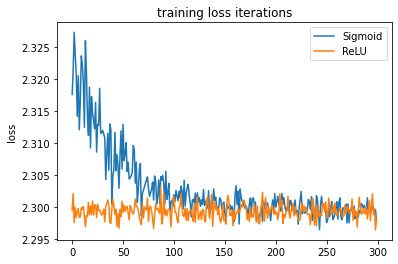

In [16]:
plt.plot(training_results['training_loss'], label='Sigmoid')
plt.plot(training_result_Relu['training_loss'], label='ReLU')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

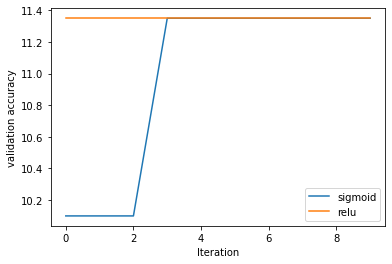

In [17]:
# Compare the validation loss

plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_result_Relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()